In [286]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [251]:
path = r'C:\Users\tom_v\becode_projects\3_ImmoWeb_scraper\immo-eliza-team6-analysis\analysis\Tom_clean_data.csv'
df = pd.read_csv(path)
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,...,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_m2
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,...,0,1,0,370,NaN,4,To renovate,0,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,...,0,1,0,895,Installed,2,Good,0,D,1796.401198
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,...,0,1,10,20,Semi equipped,2,To renovate,0,E,1785.714286
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,...,0,1,0,300,NaN,3,To renovate,0,F,1715.116279
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,...,0,1,40,32,Installed,3,Good,0,C,1600.000000


### Calculation of mode for column with or without group by:

In [252]:
df['Price'].mode()

df.groupby('Subtype')['Price'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending=False)


Subtype
Manor house        1495000
Villa               995000
Country cottage     695000
Farmhouse           450000
Mansion             449000
Town house          399000
House               399000
Bungalow            349000
Chalet               30000
Name: Price, dtype: int64

### Calculation of skew, mean, median via agg function, for whole column or with a groupby subdivision

In [253]:
columns = ['Price','price_m2','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
group = 'Subtype'
for col in columns:
    print(df[col].agg(['skew','mean','median']))
    print(df[col].mode().iloc[0])

for col in columns:
    print(df.groupby(group)[col].agg(['skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))
          
#df2.groupby(group)['Price'].agg(['skew','mean','median'])

skew           5.715944
mean      520939.115503
median    395000.000000
Name: Price, dtype: float64
399000
skew         6.512147
mean      2400.692131
median    2181.250000
Name: price_m2, dtype: float64
2500.0
skew        2.820219
mean      213.291982
median    182.000000
Name: Living_area, dtype: float64
0
skew       35.885437
mean      261.059153
median      0.000000
Name: gardenSurface, dtype: float64
0
skew      41.392603
mean      10.854640
median     0.000000
Name: terraceSurface, dtype: float64
0
skew     -0.519760
mean      2.438604
median    3.000000
Name: Number_of_facades, dtype: float64
4
skew      2.153914
mean      3.565882
median    3.000000
Name: Number_of_bedrooms, dtype: float64
3
                     skew          mean     median
Subtype                                           
Bungalow         0.541163  3.636795e+05   349000.0
Chalet           1.493161  1.928211e+05   144500.0
Country cottage  2.347865  7.252816e+05   595000.0
Farmhouse        1.575762  7.084878e

#### Loops to catch skewed numerical data, as such or using subdivision in groups of categorical data and bool data --> list

In [280]:
num_cols = ['Price','price_m2','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc','Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

skew_list = []

for col in num_cols:
    
    if (df[col].skew() < -0.5) or (df[col].skew() > 0.5):
        skew_list.append(df[col].name)
    print(df[col].agg(['count','skew','mean','median']))
    print(df[col].mode().iloc[0])
print("The following numerical columns are skewed:", skew_list)

col='Price'

for group in cat_groups:
    #if (df.groupby(group)[col].skew() < -0.5) or (df.groupby(group)[col].skew() > 0.5):
        #skew_list.append((group, col))
    print(df.groupby(group)[col].agg(['count','skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))
        
for group in bool_groups:
    #if (df.groupby(group)[col].skew() < -0.5) or (df.groupby(group)[col].skew() > 0.5):
        #skew_list.append(df.groupby(group)[col].name)
    print(df.groupby(group)[col].agg(['count','skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))



count       7134.000000
skew           5.715944
mean      520939.115503
median    395000.000000
Name: Price, dtype: float64
399000
count     6980.000000
skew         6.512147
mean      2400.692131
median    2181.250000
Name: price_m2, dtype: float64
2500.0
count     7134.000000
skew         2.820219
mean       213.291982
median     182.000000
Name: Living_area, dtype: float64
0
count     7134.000000
skew        35.885437
mean       261.059153
median       0.000000
Name: gardenSurface, dtype: float64
0
count     7134.000000
skew        41.392603
mean        10.854640
median       0.000000
Name: terraceSurface, dtype: float64
0
count     7134.000000
skew        -0.519760
mean         2.438604
median       3.000000
Name: Number_of_facades, dtype: float64
4
count     7134.000000
skew         2.153914
mean         3.565882
median       3.000000
Name: Number_of_bedrooms, dtype: float64
3
The following numerical columns are skewed: ['Price', 'price_m2', 'Living_area', 'gardenSurface', 'terrac

[Text(0.5, 1.0, 'Price')]

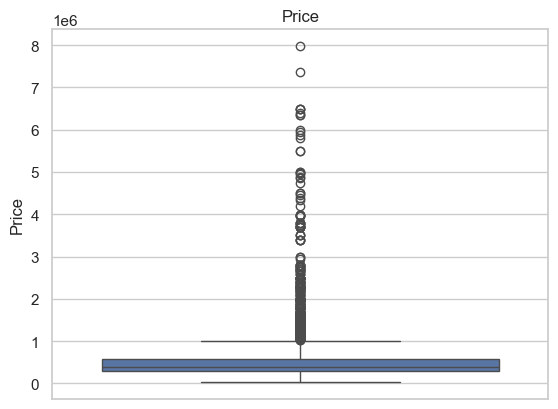

In [312]:
sns.boxplot(data=df, y='Price', orient="v").set(title='Price')

In [380]:
#df.groupby('Subtype')[['Price']].mean().astype('int64').sort_values(by='Price', ascending=False)

# Step 1: Calculate median value for each Category
category_medians = df.groupby('Subtype')['Price'].median().sort_values()

# Step 2: Get the sorted order of categories based on the median
sorted_categories = category_medians.index

print(sorted_categories)

Index(['Chalet', 'Bungalow', 'House', 'Town house', 'Farmhouse',
       'Country cottage', 'Mansion', 'Villa', 'Manor house'],
      dtype='object', name='Subtype')


### loop for subplot of boxplot of numerical columns

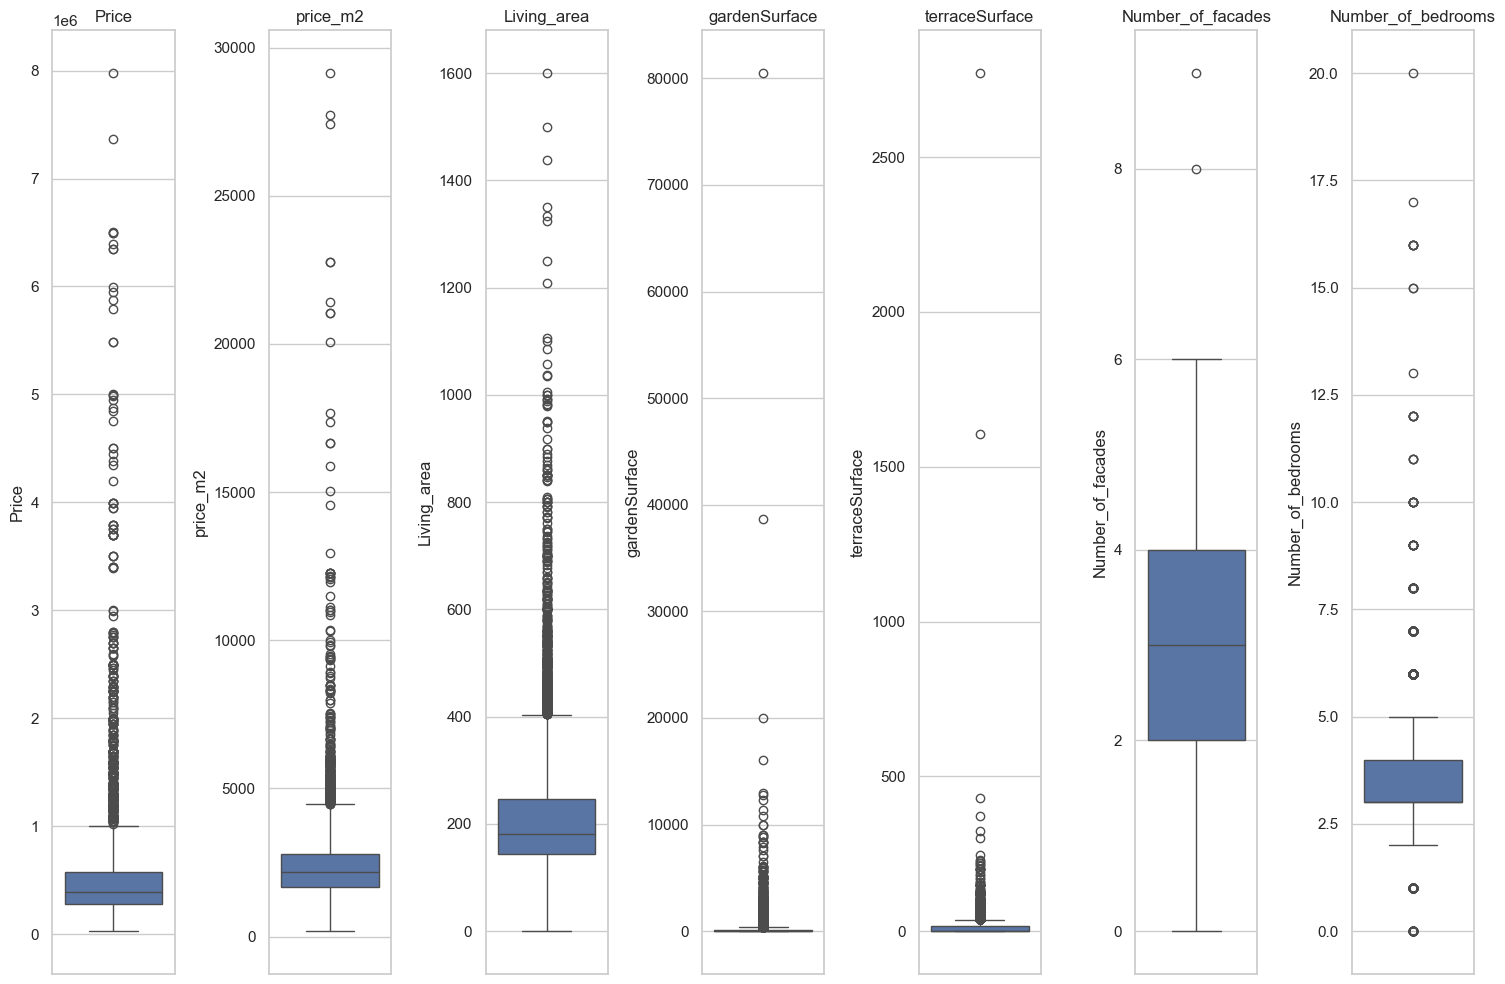

In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2', 'Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

histogram plots of the numerical categories

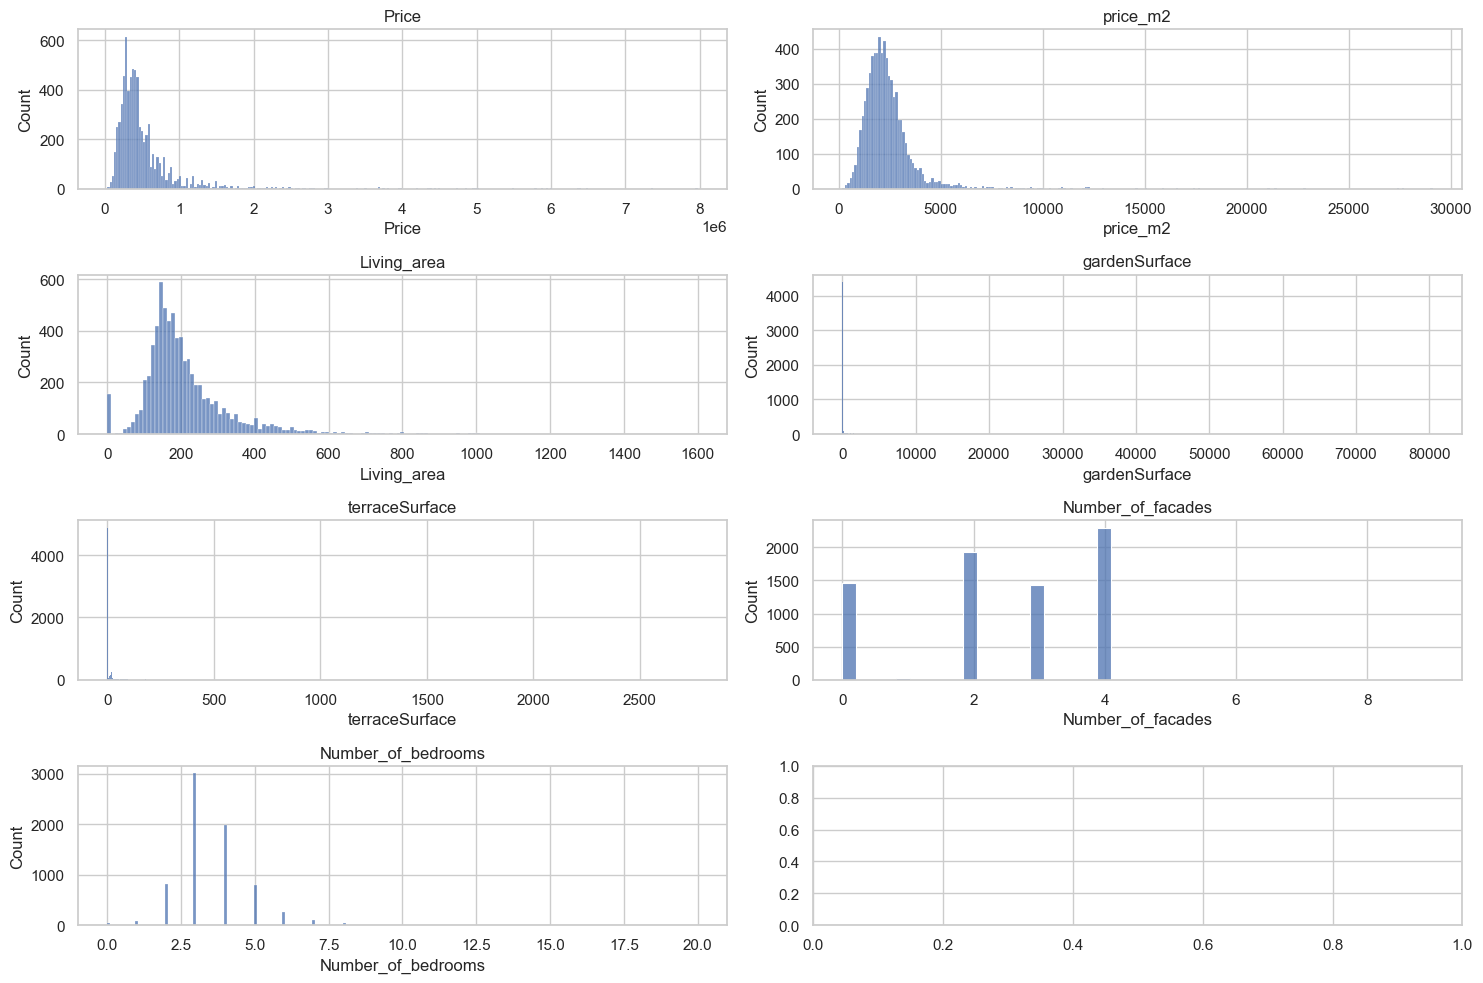

In [382]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2', 'Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

BoxPlots with sorting according to median value of subgroup

Text(0.5, 1.0, 'Price')

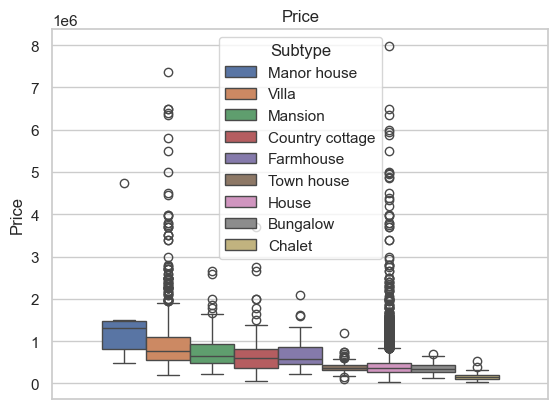

In [386]:
sns.set_style("whitegrid")

df.groupby('Subtype')[['Price']].mean().astype('int64').sort_values(by='Price', ascending=False)

# Step 1: Calculate the median for the category Price, grouped per subtype
medians = df.groupby(['Subtype'])['Price'].median().reset_index()

# Step 2: Sort the categories based on the median value of 'Value'
category_order = medians.groupby(['Subtype'])['Price'].median().sort_values(ascending=False).index

sns.boxplot(data=df, y='Price', hue='Subtype', hue_order=category_order, orient="v").set_title('Price')


box plots of 'Price' (numerical data), grouped according to categorical data (dataset = cleaned_data)

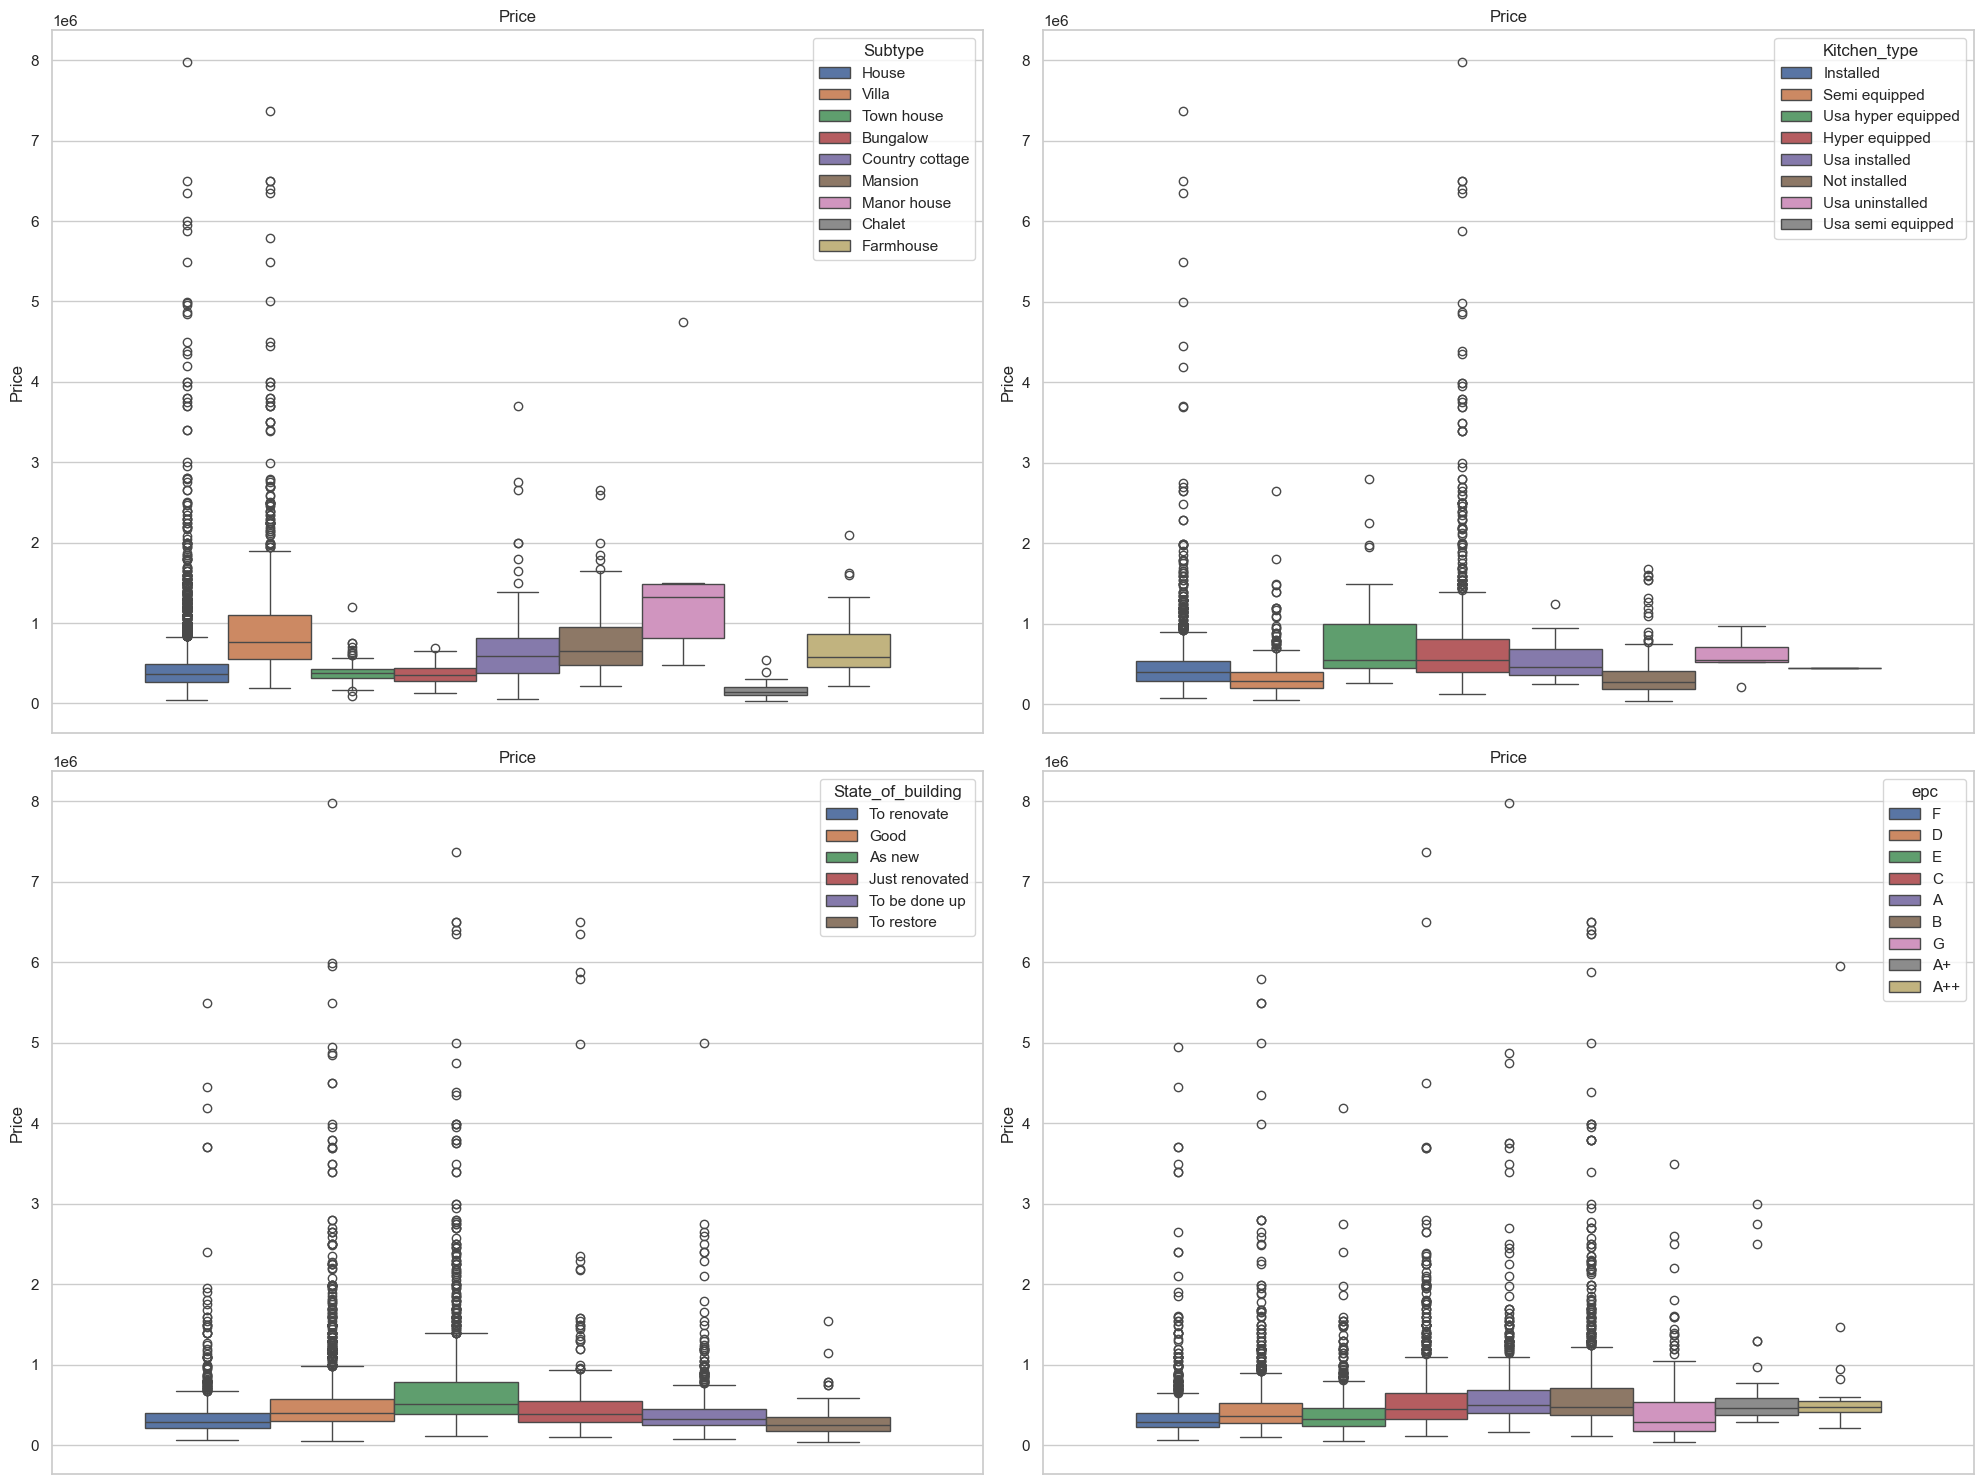

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] #,'Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

col = 'Price'
# Loop over the columns and create a scatter plot for each
for i, cat_grp in enumerate(cat_groups):    
    sns.boxplot(data=df, y=col, hue=cat_grp, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()



boxplots of Price, grouped per categorical data, and sorted according to median

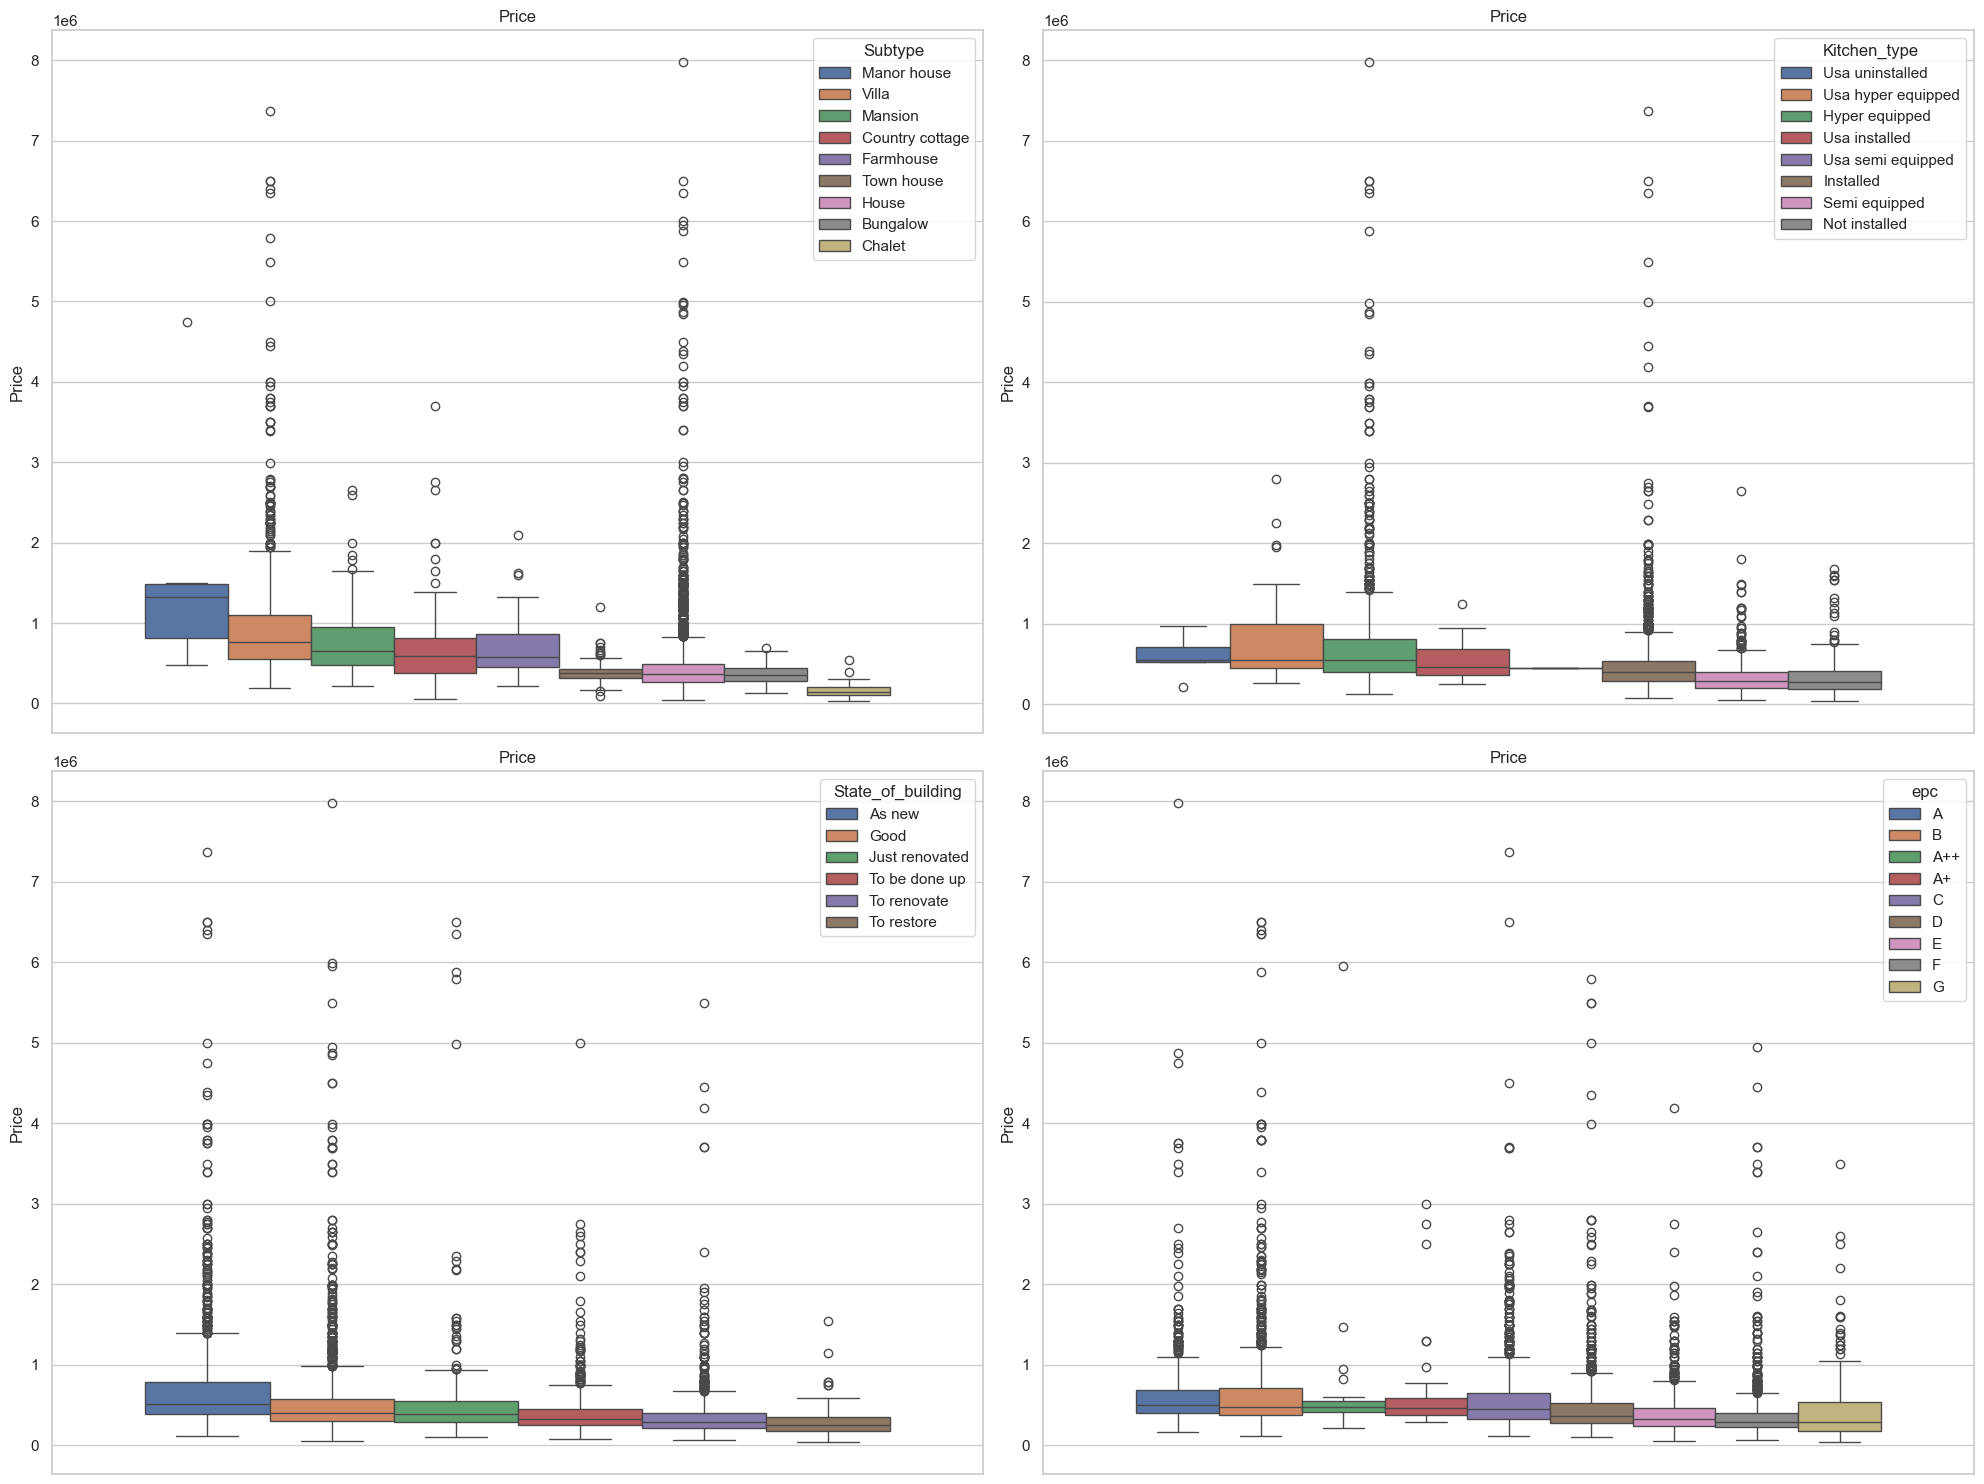

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] #,'Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))


# Flatten the ax array for easier indexing
ax = ax.ravel()

sns.set_style("whitegrid")
col = 'Price' # for data on Price only


# Loop over the columns and create a scatter plot for each
for i, grp in enumerate(cat_groups):    
    # Step 1: Calculate the median for the category Price, grouped per subtype
    medians = df.groupby(grp)[col].median().reset_index()

    # Step 2: Sort the categories based on the median value of 'Value'
    category_order = medians.groupby(grp)[col].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df, y=col, hue=grp, hue_order=category_order, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()

box plots of 'Price' (numerical data), grouped according to boolean data (dataset = cleaned_data)

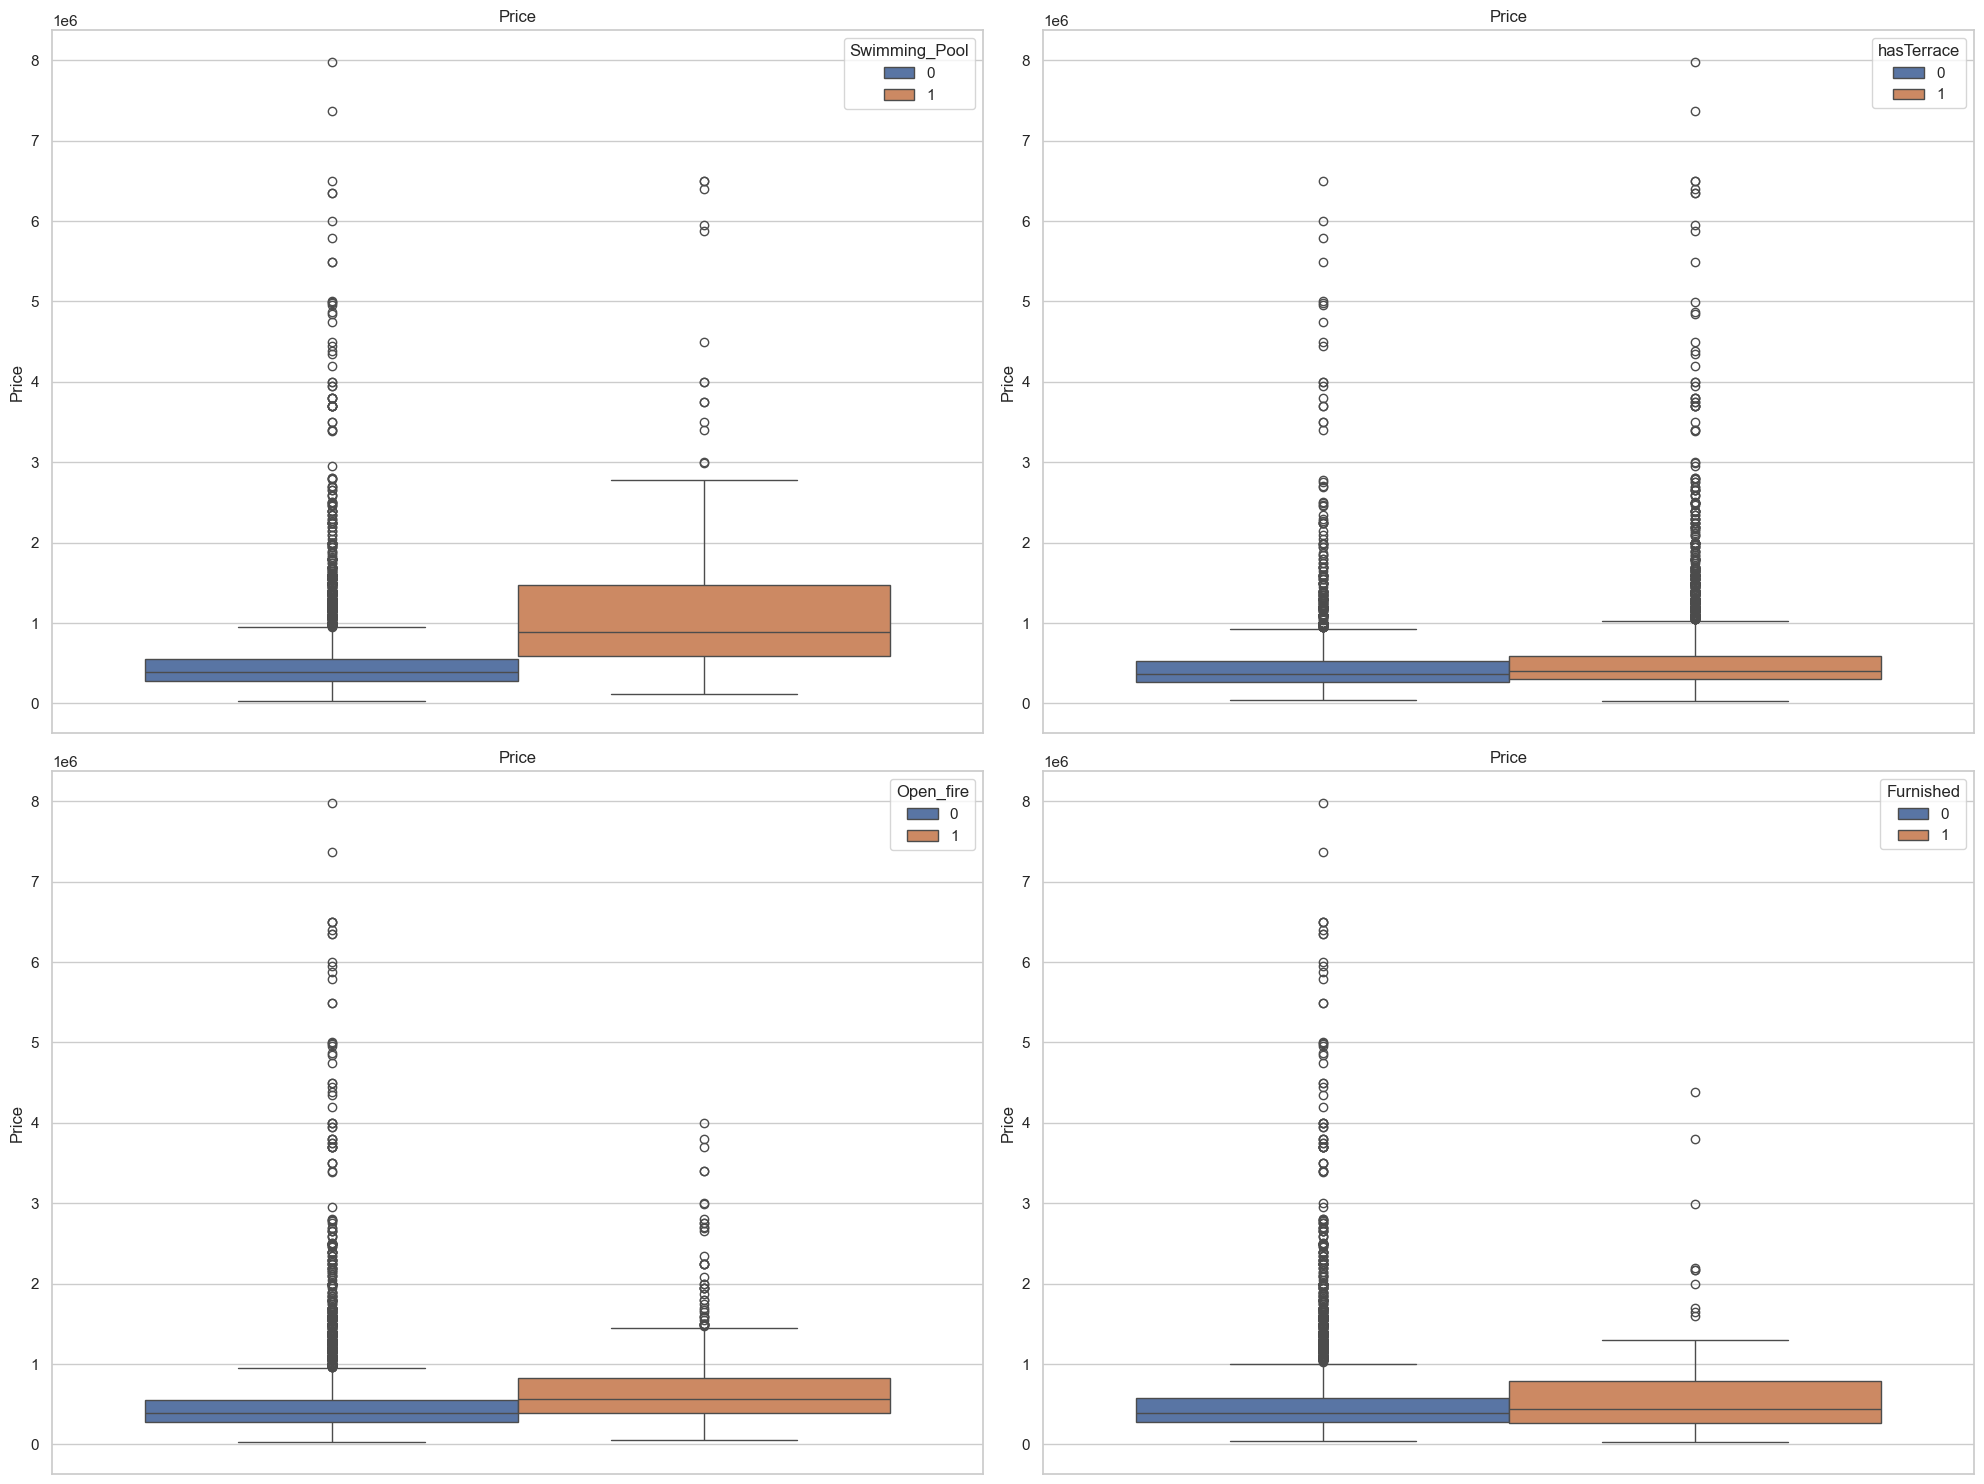

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] #,'Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

col = 'Price'
# Loop over the columns and create a scatter plot for each
for i, grp in enumerate(bool_groups):    
    sns.boxplot(data=df, y=col, hue=grp, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()


Numerical data grouped per subtype (categorical data)

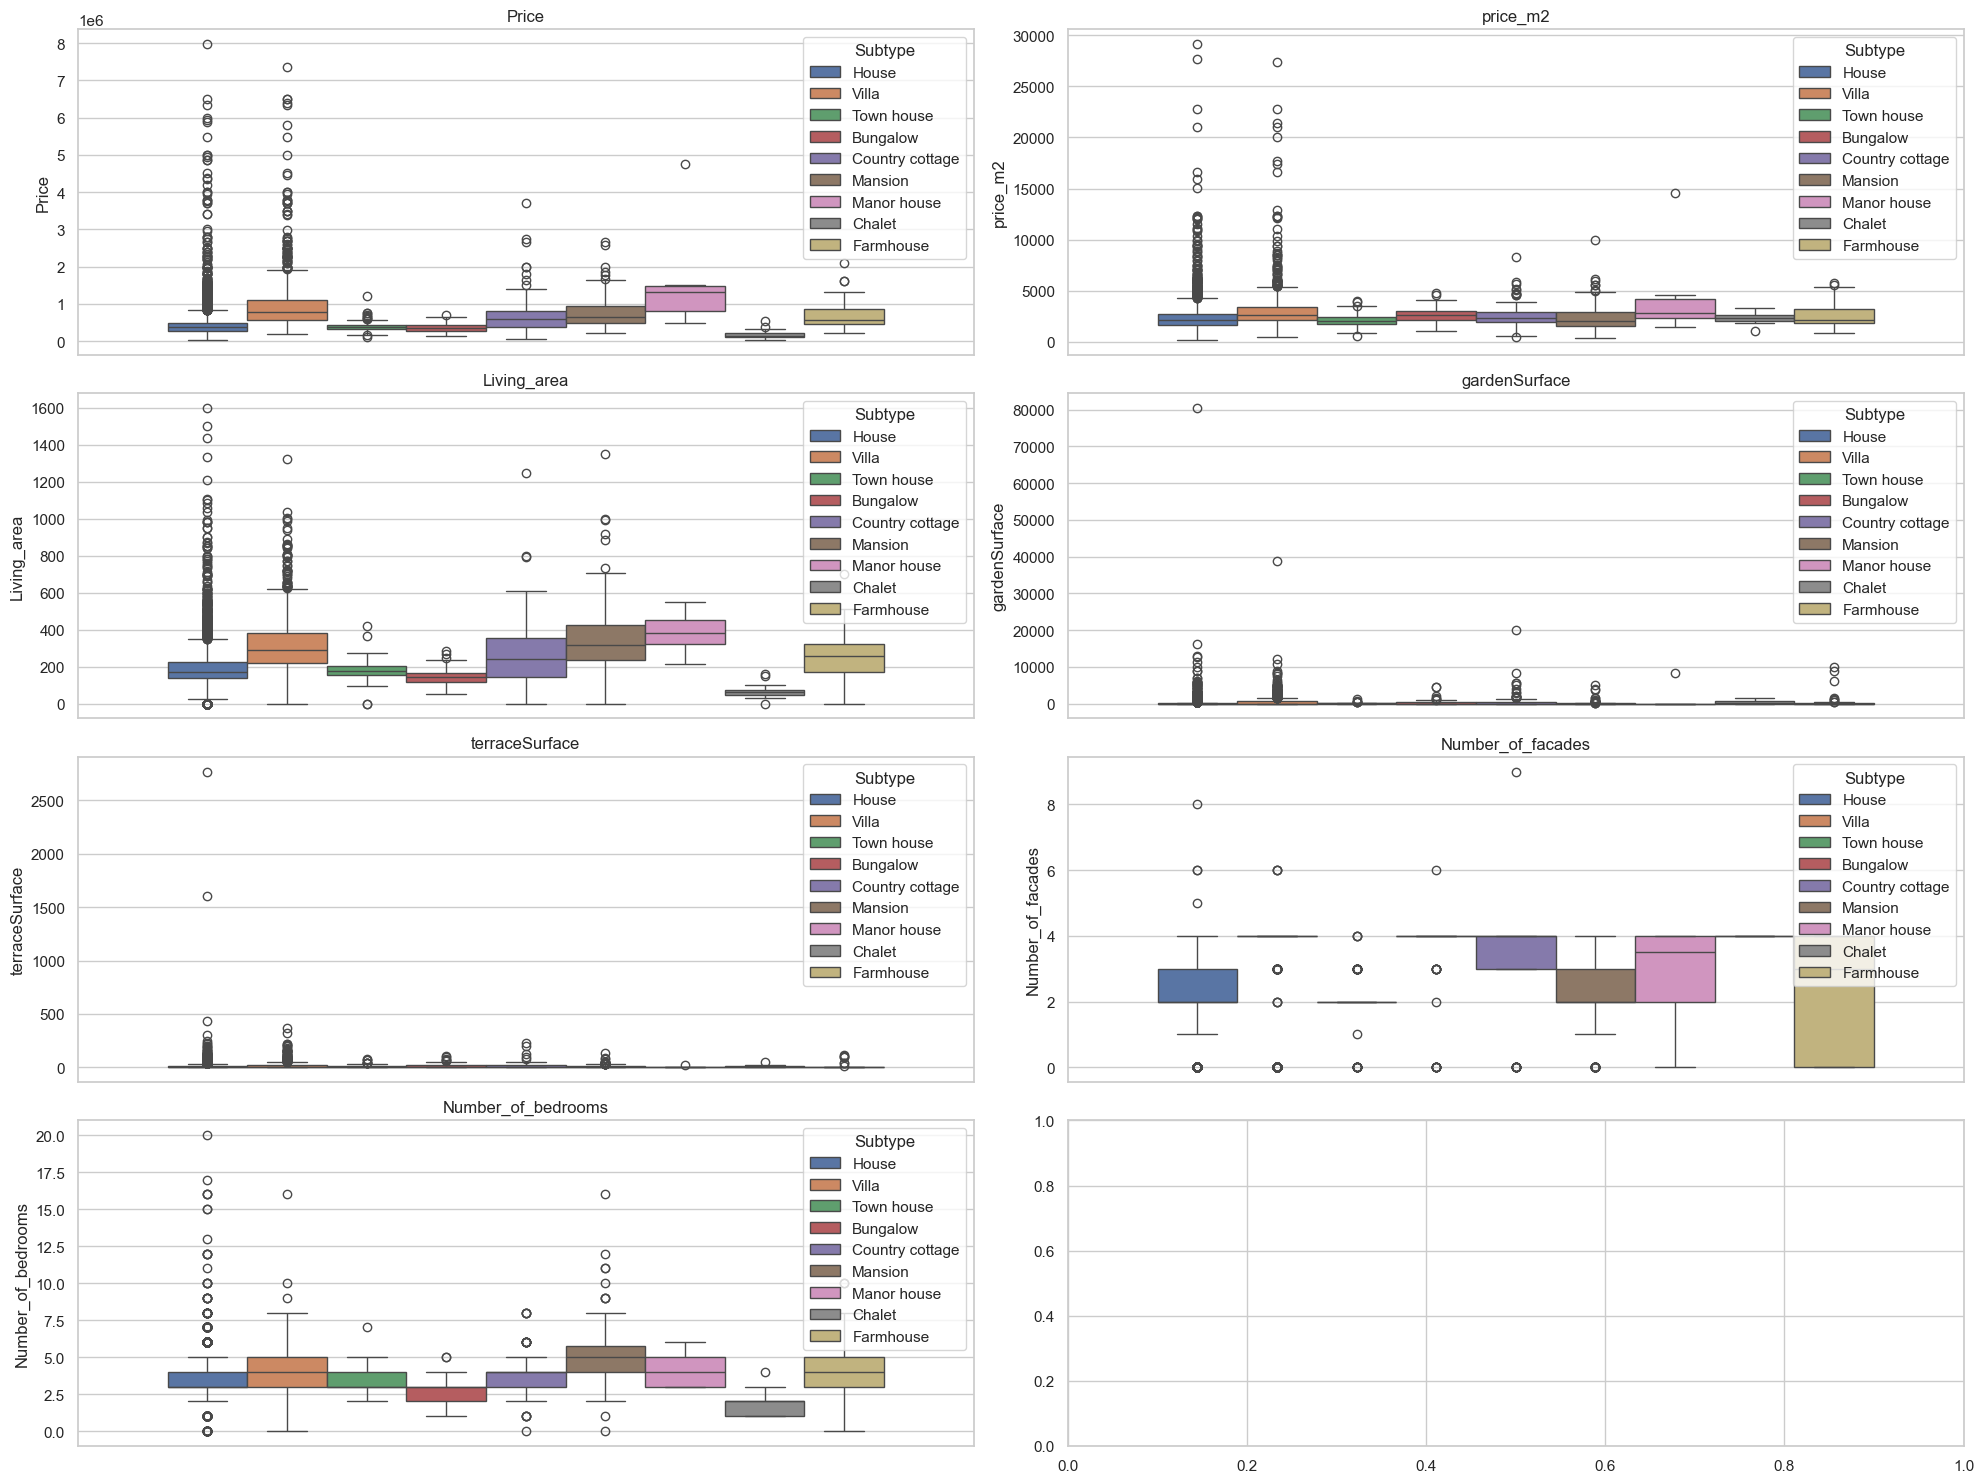

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):    
    sns.boxplot(data=df, y=col, orient="v", hue='Subtype', ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

box plots of the numerical data, grouped boolean data 'Swimming_pool' (dataset = cleaned_data)


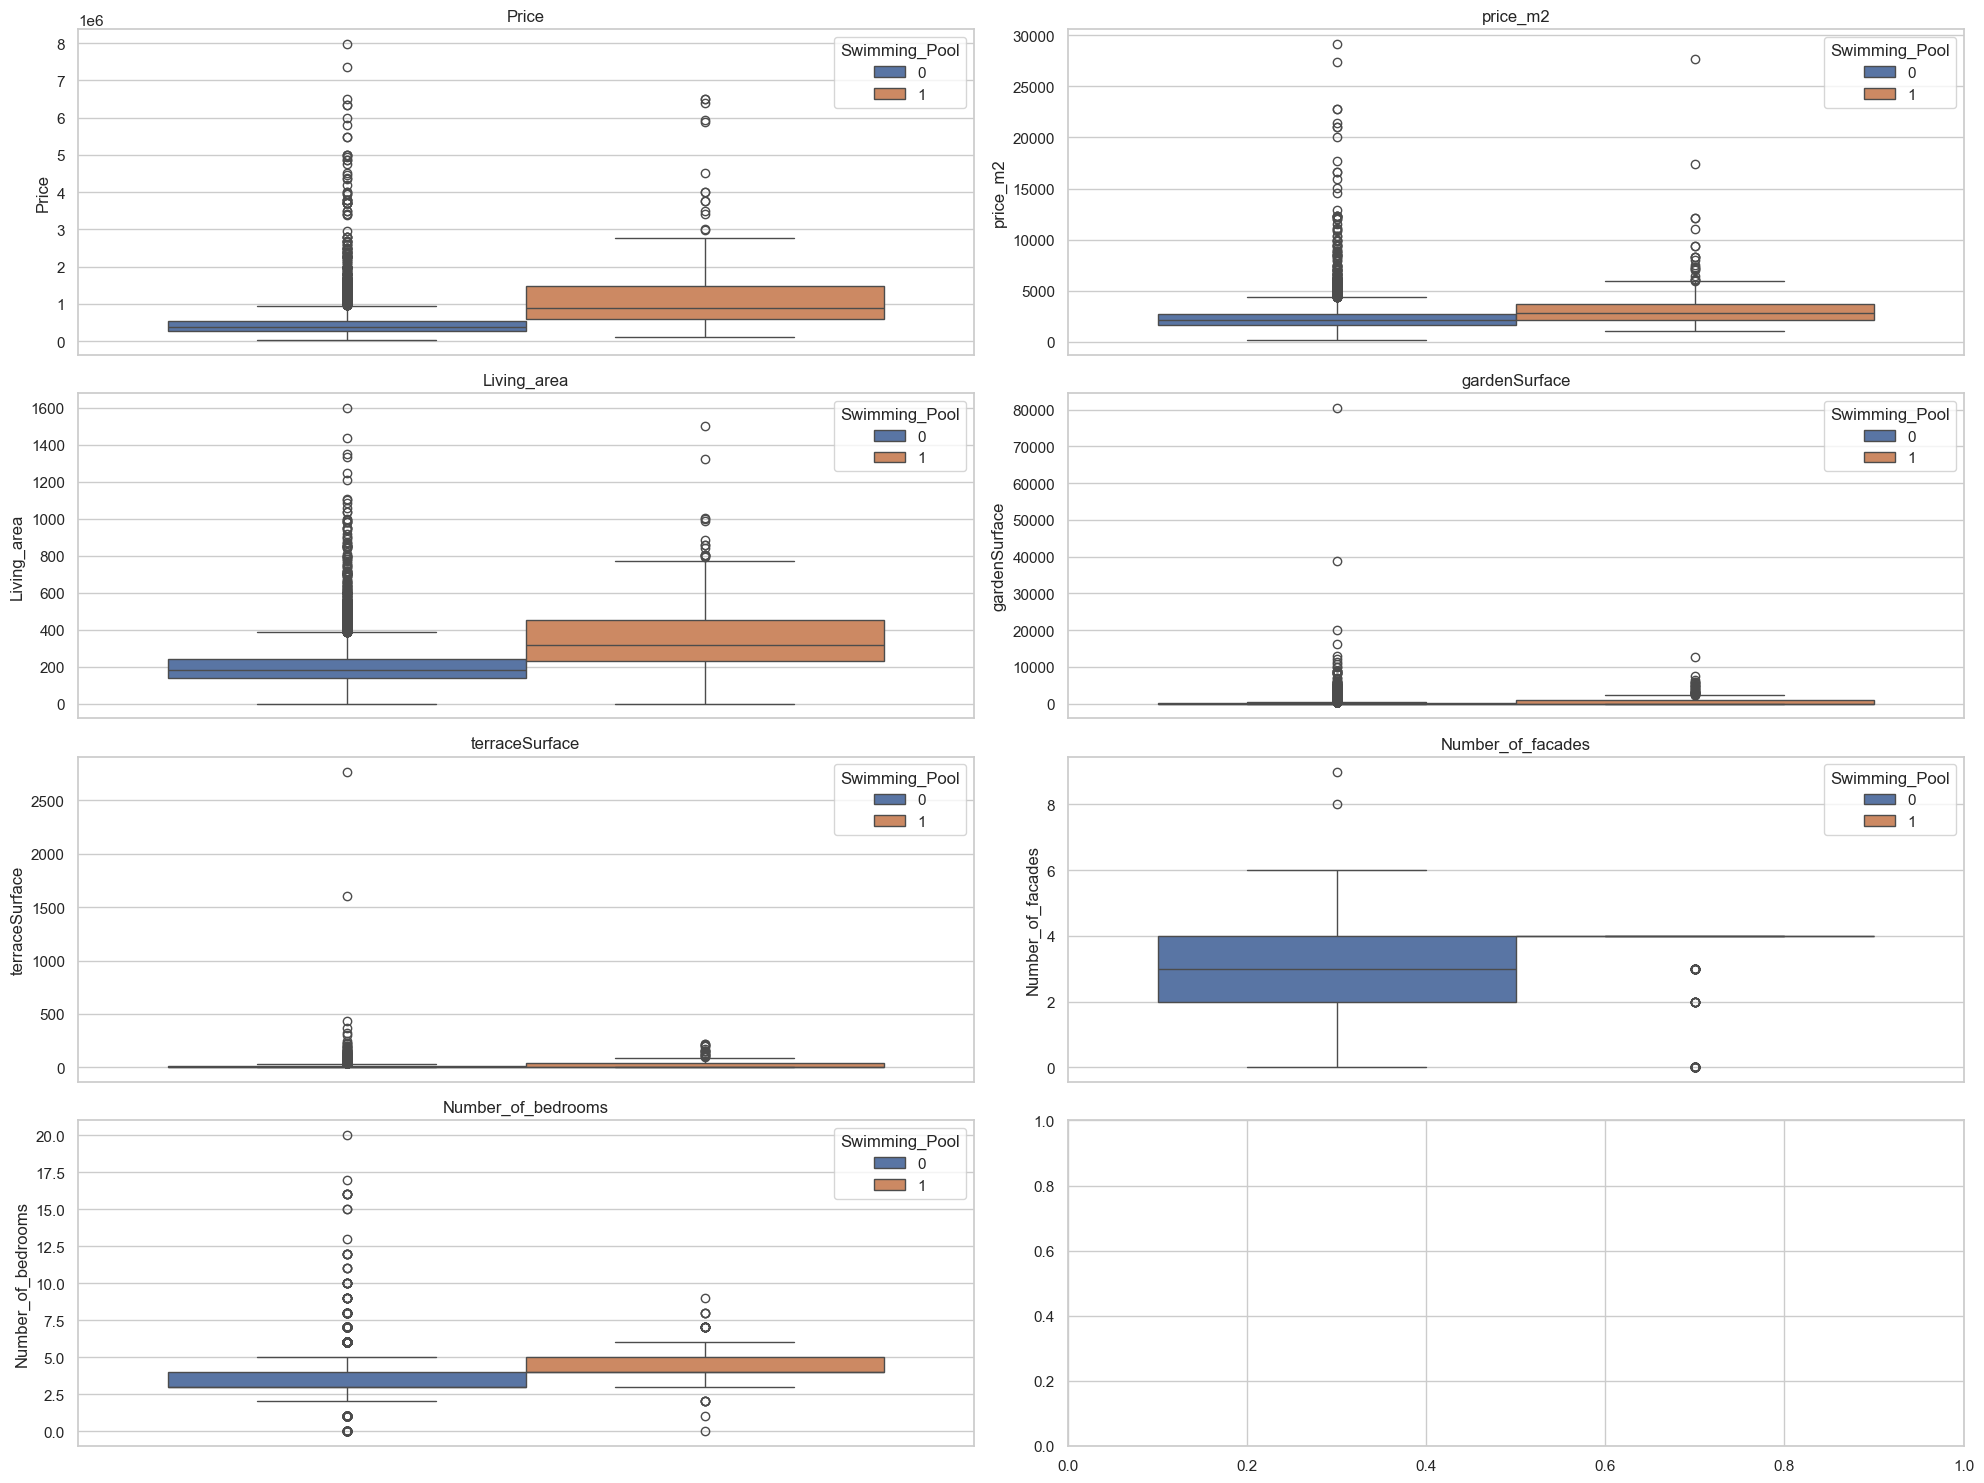

In [354]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):    
    sns.boxplot(data=df, y=col, orient="v", hue='Swimming_Pool', ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers 6, 5, 8, 9 from 'Number_of_facades' column
#values_to_remove = [6, 5, 8, 9]
#data_scraped = data_scraped[~data_scraped['Number_of_facades'].isin(values_to_remove)]

# Outliers by 'Number Of Bedrooms' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

#q1 = data_scraped['Number_of_bedrooms'].quantile(0.25)
#q3 = data_scraped['Number_of_bedrooms'].quantile(0.75)
#iqr = q3 - q1

# Specifying the scope of outliners
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Data filtering
#data_scraped = data_scraped[(data_scraped['Number_of_bedrooms'] >= lower_bound) & 
#                             (data_scraped['Number_of_bedrooms'] <= upper_bound)]

# Display first 5 rows
#data_scraped.head()

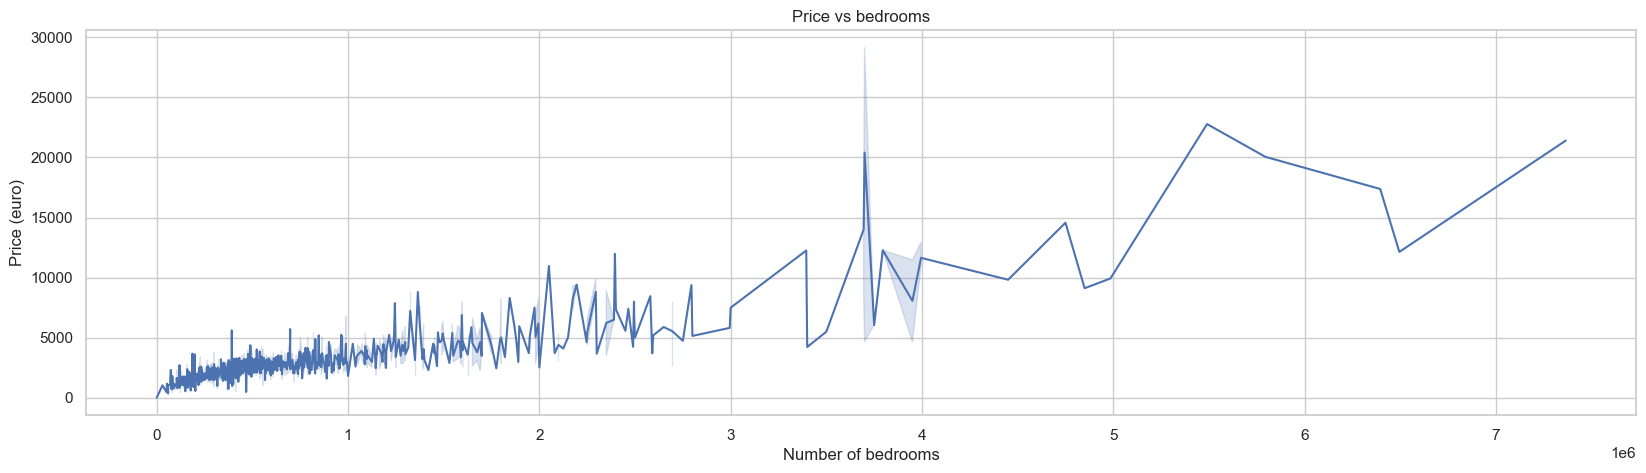

In [135]:

sns.set_style("whitegrid")

fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Price', y='price_m2', data=df).set(title='Price vs bedrooms', xlabel='Number of bedrooms', ylabel='Price (euro)')
#sns.relplot(x='Number_of_bedrooms', y='Price', data=df, kind='line')
sns.set_theme(style='white')


In [118]:
columns = ['Price','price_m2','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']

for col in columns:
    print(col)
    print(round(df[col].skew()))
    print(round(df[col].mean()))
    print(round(df[col].median()))
    print(round(df[col].mode()))


Price
6
488943
389000
0    399000
Name: Price, dtype: int64
price_m2


KeyError: 'price_m2'

In [105]:
df['Price'].mean()

"""
sns.barplot(data=df, x='State_of_building', y='Price')

columns = ['Subtype','State_of_building','Kitchen_type']
for column in columns:
    print(sns.barplot(data=df, x=column))


    print(column)
    print(round(df[column].skew()))
    print(round(df[column].mean()))
    print(round(df[column].median()))
    print(round(df[column].mode()))
"""


"\nsns.barplot(data=df, x='State_of_building', y='Price')\n\ncolumns = ['Subtype','State_of_building','Kitchen_type']\nfor column in columns:\n    print(sns.barplot(data=df, x=column))\n\n\n    print(column)\n    print(round(df[column].skew()))\n    print(round(df[column].mean()))\n    print(round(df[column].median()))\n    print(round(df[column].mode()))\n"